# Third exercise

#### Please update download directory for file
Download link for data: https://data.cityofnewyork.us/api/views/k397-673e/rows.csv?accessType=DOWNLOAD

In [1]:
from os import chdir
chdir("/home/napstar/Downloads/Documents/TDI/")

In [2]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

##### dtype for work location necessary, since few entries were blank

In [3]:
data = pd.read_csv('Citywide_Payroll_Data__Fiscal_Year_.csv', dtype ={'Work Location Borough':str})

In [4]:
data['Agency Name'] = data['Agency Name'].str.strip()

##### Convert all currency data to float

In [5]:
data['Base Salary'] = data['Base Salary'].replace('[\$,]', '', regex=True).astype(float)
data['Regular Gross Paid'] = data['Regular Gross Paid'].replace('[\$,]', '', regex=True).astype(float)
data['Total OT Paid'] = data['Total OT Paid'].replace('[\$,]', '', regex=True).astype(float)
data['Total Other Pay'] = data['Total Other Pay'].replace('[\$,]', '', regex=True).astype(float)

##### Get start year only

In [6]:
data['Agency Start Date'] = data['Agency Start Date'].str[-4:]

### Cond1: Active employee

In [7]:
indxActive = data['Leave Status as of June 30'] == 'ACTIVE'
dataActive = data[indxActive]

In [8]:
# emplCountAll = dataActive.groupby(['Agency Name']).size().reset_index()

### Cond2: Annual pay basis employee (tenure based) 

In [9]:
indxTenActive = dataActive['Pay Basis'].str.contains('per Annum')
dataTenActive = dataActive[indxTenActive]

emplCountTen= dataTenActive.groupby(['Agency Name']).size().reset_index()

### Cond3: Records with regular hours made available 

In [10]:
indxWrkHrs = dataTenActive['Regular Hours'] > 0
dataTenActiveWrk = dataTenActive[indxWrkHrs]

## Calculate experience
Based on start date of employee till fiscal year

In [11]:
dataTenActiveWrk['Agency Start Date'] =  dataTenActiveWrk['Agency Start Date'].astype(int)
dataTenActiveWrk['Fiscal Year']= dataTenActiveWrk['Fiscal Year'].astype(int)

dataTenActiveWrk['Exp'] =  dataTenActiveWrk['Fiscal Year'] - dataTenActiveWrk['Agency Start Date']

/home/napstar/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/napstar/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/napstar/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

### Cond 4: Employee with experience > 1 year

In [12]:
indxExp = dataTenActiveWrk['Exp'] > 1
dataTenActiveWrkExp = dataTenActiveWrk[indxExp]

In [13]:
print('Data size initial:',len(data))
print('Data size after cond1:',len(dataActive))
print('Data size after cond2:',len(dataTenActive))
print('Data size after cond3:',len(dataTenActiveWrk))
print('Data size after cond4:',len(dataTenActiveWrkExp))

Data size initial: 2194488
Data size after cond1: 1885826
Data size after cond2: 1126635
Data size after cond3: 673434
Data size after cond4: 591419


##### Snapshot of data and salary distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98067760b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9809ade358>]], dtype=object)

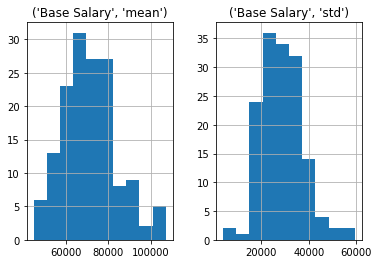

In [14]:
dataTenActiveWrkExp.groupby(['Agency Name']).agg({'Base Salary':['mean','std']}).hist()

In [15]:
dataTenActiveWrkExp.head()

,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Exp
0,2016,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,2003,MANHATTAN,COMMUNITY ASSOCIATE ...,ACTIVE,47678.0,per Annum,1830.0,47166.03,2.25,57.28,0.0,13
1,2016,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT ...,ACTIVE,119959.0,per Annum,1831.0,119042.50,0.00,0.00,0.0,21
3,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,2014,MANHATTAN,COMPUTER SYSTEMS MANAGER ...,ACTIVE,116000.0,per Annum,1831.0,115104.57,0.00,0.00,0.0,2
5,2016,DISTRICT ATTORNEY-MANHATTAN,ABREU,JENNIFER,NaN,2012,MANHATTAN,ASSISTANT DISTRICT ATTORNEY ...,ACTIVE,71500.0,per Annum,1831.0,71967.34,0.00,0.00,0.0,4
6,2016,DISTRICT ATTORNEY-MANHATTAN,ABREU,JUAN,D,2007,MANHATTAN,ASSISTANT DISTRICT ATTORNEY ...,ACTIVE,88000.0,per Annum,1831.0,87614.01,0.00,0.00,750.0,9


## Calculate typical work hours for job title in every agency

##### Identify median of regular hours for a given job title in each agency

In [16]:
workHrsGroup = dataTenActiveWrkExp.groupby(['Agency Name','Title Description'])['Regular Hours'].median().reset_index()
workHrsGroup = workHrsGroup.rename(index=str,columns={'Regular Hours': 'Typical hours'})

In [17]:
workHrsGroup.head()

,Agency Name,Title Description,Typical hours
0,ADMIN FOR CHILDREN'S SVCS,*ATTORNEY AT LAW ...,1825.00
1,ADMIN FOR CHILDREN'S SVCS,*CERTIFIED APPLICATIONS DEVELOPER ...,1825.00
2,ADMIN FOR CHILDREN'S SVCS,*CERTIFIED DATABASE ADMINISTRATOR ...,1825.00
3,ADMIN FOR CHILDREN'S SVCS,*CERTIFIED LOCAL AREA NETWORK ADMINISTRATOR ...,1825.00
4,ADMIN FOR CHILDREN'S SVCS,*COOK ...,2085.72


##### Merge values with complete data

In [18]:
dataTenActiveWrkExpwthHrs = pd.merge(dataTenActiveWrkExp,workHrsGroup,left_on=['Agency Name','Title Description'],right_on=['Agency Name','Title Description'],how='left')

##### Add defaulter for working hours in data

In [19]:
dataTenActiveWrkExpwthHrs['Work hours diff from expected'] = dataTenActiveWrkExpwthHrs['Regular Hours'] - dataTenActiveWrkExpwthHrs['Typical hours']
dataTenActiveWrkExpwthHrs['Relative Work hours diff from expected'] = (dataTenActiveWrkExpwthHrs['Regular Hours']  / dataTenActiveWrkExpwthHrs['Typical hours'])*100

## Calculate maximum base salary in every agency

##### To be used for comparing employee's tendency to take leave based on salary scale

In [20]:
salGroup = dataTenActiveWrkExpwthHrs.groupby(['Agency Name'])['Base Salary'].max().reset_index()
salGroup = salGroup.rename(index=str,columns={'Base Salary': 'Max Salary by Agency'})

##### Merge data with complete data

In [21]:
dataTenActiveWrkExpwthHrsMaxSal = pd.merge(dataTenActiveWrkExpwthHrs,salGroup,left_on=['Agency Name'],right_on=['Agency Name'],how='left')

##### Add relative salary scale for employees

In [22]:
dataTenActiveWrkExpwthHrsMaxSal['Relative salary in agency %'] = (dataTenActiveWrkExpwthHrsMaxSal['Base Salary']  / dataTenActiveWrkExpwthHrsMaxSal['Max Salary by Agency'])*100
dataTenActiveWrkExpwthHrsMaxSal['Salary scale'] = np.ceil(dataTenActiveWrkExpwthHrsMaxSal['Relative salary in agency %']/10)*10

## Analyze individual employee data

In [23]:
emplWthLeaves = dataTenActiveWrkExpwthHrsMaxSal[dataTenActiveWrkExpwthHrsMaxSal['Relative Work hours diff from expected']<100]

In [24]:
print('Total employees, with experience > 1year, not on leave and having working hours data reported:',len(dataTenActiveWrkExpwthHrs))
print('Employees who took leave, having experience > 1year, not on leave and having working hours data reported:',len(emplWthLeaves))

Total employees, with experience > 1year, not on leave and having working hours data reported: 591419
Employees who took leave, having experience > 1year, not on leave and having working hours data reported: 120923


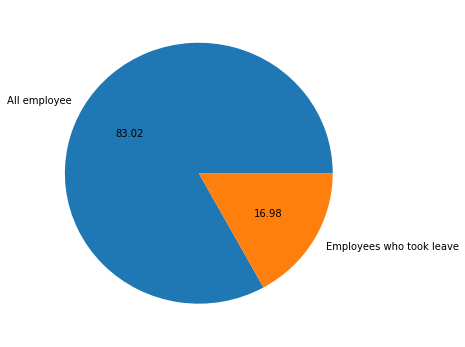

In [25]:
# Plot
leavesSeries = pd.Series([len(dataTenActiveWrkExpwthHrsMaxSal),len(emplWthLeaves)],index=['All employee','Employees who took leave'],name='')
leavesSeries.plot.pie(figsize=(6, 6), autopct='%.2f')

## Check relation between experience and leaves

In [26]:
emplLeaveGrp = emplWthLeaves.groupby(['Agency Name','Last Name','First Name','Mid Init'])
dataleaveExp = emplLeaveGrp.agg({'Base Salary':'max','OT Hours':'max','Total OT Paid':'max','Exp':'max','Relative Work hours diff from expected':'min'}).reset_index()

dataleaveExp = dataleaveExp.sort_values(['Exp'],ascending=[True])

#### Plot data for % of work hours to experience

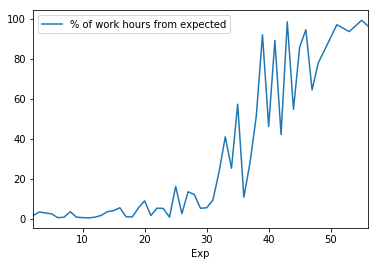

In [27]:
dataleaveforPlot = dataleaveExp.groupby(['Exp'])['Relative Work hours diff from expected'].agg(['min']).reset_index()
dataleaveforPlot = dataleaveforPlot.rename(index=str,columns={'min':'% of work hours from expected'})
dataleaveforPlot.plot(x='Exp')

#### Correlation statistics

In [28]:
m,c,r,pval,err = stats.linregress(dataleaveforPlot['Exp'],dataleaveforPlot['% of work hours from expected'])
print('Regression statistics for relation between experience and % of work hours, Slope:',m,'r^2:',r*r, 'with p-val:',pval)

Regression statistics for relation between experience and % of work hours, Slope: 2.0090382396 r^2: 0.743338134396 with p-val: 4.42070978352e-16


## Check relation between experience and Overtime hours

#### Plot data for overtime hours to experience

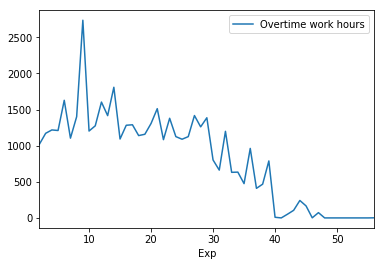

In [29]:
dataleaveforPlot = dataleaveExp.groupby(['Exp'])['OT Hours'].agg(['max']).reset_index()
dataleaveforPlot = dataleaveforPlot.rename(index=str,columns={'max':'Overtime work hours'})
dataleaveforPlot.plot(x='Exp')

#### Correlation statistics

In [30]:
m,c,r,pval,err = stats.linregress(dataleaveforPlot['Exp'],dataleaveforPlot['Overtime work hours'])
print('Regression statistics for relation between experience and overtime work hours, Slope:',m,'r^2:',r*r, 'with p-val:',pval)

Regression statistics for relation between experience and overtime work hours, Slope: -33.3072599356 r^2: 0.694058510588 with p-val: 3.37589907702e-14


## Check relation between salary scale and leaves

In [31]:
emplLeaveGrp = emplWthLeaves.groupby(['Agency Name','Last Name','First Name','Mid Init'])
dataleaveSal = emplLeaveGrp.agg({'Base Salary':'max','Max Salary by Agency':'max','Salary scale':'max','OT Hours':'max','Total OT Paid':'max','Exp':'max','Relative Work hours diff from expected':'min'}).reset_index()

dataleaveSal = dataleaveSal.sort_values(['Salary scale'],ascending=[True])

In [32]:
dataleaveSal.head()

,Agency Name,Last Name,First Name,Mid Init,Max Salary by Agency,Exp,Salary scale,Base Salary,Relative Work hours diff from expected,OT Hours,Total OT Paid
25952,OFFICE OF THE COMPTROLLER,BERKOWITZ,CRAIG,B,350000.0,9,10.0,29897.0,99.616438,0.00,0.00
36836,POLICE DEPARTMENT,HOSSAIN,MD,J,226366.0,3,20.0,32426.0,91.420619,677.50,15432.07
36835,POLICE DEPARTMENT,HOSSAIN,MD,A,226366.0,4,20.0,37713.0,91.420619,647.25,18365.68
8024,DEPARTMENT OF PROBATION,OLIVACCE,BRENDA,C,212044.0,21,20.0,33824.0,98.319452,0.00,0.00
36833,POLICE DEPARTMENT,HOSIER,SHANA,C,226366.0,7,20.0,42136.0,99.610028,363.25,10577.13


#### Plot data for % of work hours to salary scale

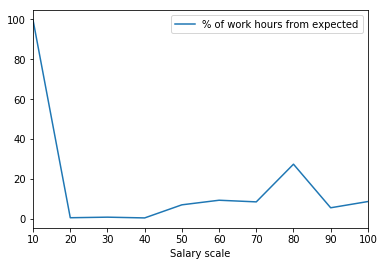

In [33]:
dataleaveSalforPlot = dataleaveSal.groupby(['Salary scale'])['Relative Work hours diff from expected'].agg(['min']).reset_index()
dataleaveSalforPlot = dataleaveSalforPlot.rename(index=str,columns={'min':'% of work hours from expected'})
dataleaveSalforPlot.plot(x='Salary scale')

In [34]:
dataleaveSalforPlot

,Salary scale,% of work hours from expected
0,10.0,99.616438
1,20.0,0.535890
2,30.0,0.821918
3,40.0,0.445682
4,50.0,7.013699
5,60.0,9.314769
6,70.0,8.493151
7,80.0,27.397260
8,90.0,5.534247
9,100.0,8.657534


## Check relation between salary scale and overtime hours

#### Plot data for % of work hours to experience

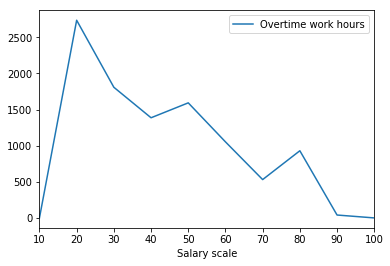

In [35]:
dataleaveSalforPlot = dataleaveSal.groupby(['Salary scale'])['OT Hours'].agg(['max']).reset_index()
dataleaveSalforPlot = dataleaveSalforPlot.rename(index=str,columns={'max':'Overtime work hours'})
dataleaveSalforPlot.plot(x='Salary scale')